In [1]:
#3 April 7, 2017       S&P 500: -0.08%


In [12]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

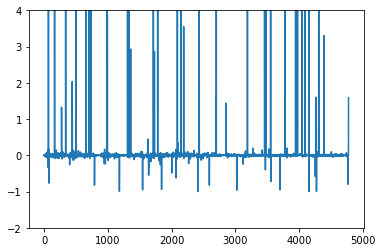

In [13]:
data = pd.read_csv("3.csv") 
price1=np.zeros(4779)
price2=np.zeros(4779)
price1=data['Price 4/6/2017'].values
price2=data['Price 4/7/2017'].values
pricechange=(price2-price1)/price1
pricechange.shape
x=np.arange(4779)
plt.plot(x,pricechange)
plt.ylim(-2,4)
plt.show()

67 25.349999999999994
337 11919.0
656 14.166666666666666
701 19.571428571428573
737 19.0
989 21.35714285714286
1309 35.19047619047619
1714 9689.0
1782 23.365853658536587
2091 27473.999999999996
2434 10.049250535331906
3191 5991.499999999999
3460 7223.999999999999
3483 2095.0
3555 445.25000000000006
3783 311.5
3947 29.419793145406608
4048 180.48148148148147
4098 110.37037037037037
4310 726.6478679504814


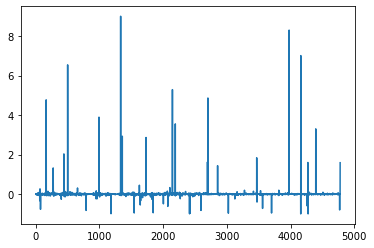

In [14]:
for i in range(4779):
    if pricechange[i]>10:
        print(i,pricechange[i])
        pricechange[i]=0
plt.plot(x,pricechange)
#plt.ylim(-2,4)
plt.show()

In [15]:
cluster_distance=[]
clusters=[]
for k in range(20,200,2): #try to find the elbow point 
    price3index=np.zeros((4779,2))  #2*4779 table 
    center=(np.random.rand(k)-0.5)*0.1  #random choose centers 
    total=0
    for j in range(100):     #iteration
        for i in range(4779):
            distance=np.abs(pricechange[i]-center)  #distance between each center to each point
            price3index[i]=[np.argmin(distance),np.min(distance)]   #index and shortest distance
        count=np.zeros((k,2))
        for i in range(4779):
            count[int(price3index[i][0])][0]+=1
            count[int(price3index[i][0])][1]+=pricechange[i]
            center=count[:,1]/(count[:,0]+1e-9)

    for i in range(4779):
        total=total+price3index[i][1] #shortest total distance of each point to its center point
    print(k,total)
    cluster_distance.append(total)
    clusters.append(k)

20 24.635098160887726
22 23.586098975094274
24 22.053468522843712
26 20.755539781336605
28 20.326990565371588
30 19.134450932933028
32 18.29166720621654
34 18.593804533766555
36 17.841756616672967
38 17.544701111762542
40 17.2170415883424
42 16.940223890203
44 16.909665892067334
46 16.689748247477546
48 16.52289898457143
50 16.462773919344514
52 16.30953278995341
54 16.051589282380988
56 16.033849592032645
58 15.989498803861752
60 16.093435370743705
62 15.829599992142336
64 15.95724375453931
66 15.804135601379869
68 15.700161902844252
70 15.61103635412991
72 15.675302856694616
74 15.390006386929658
76 15.375816325220404
78 15.500633325308995
80 15.33977551573959
82 15.43543684244442
84 15.171450031506568
86 15.315679961133347
88 15.267566961171942
90 15.296794110005456
92 15.163883071095912
94 15.13535733474492
96 15.028158621513448
98 15.176939768247673
100 14.959016217128925
102 15.079448791559717
104 14.948731008698372
106 15.047823838923591
108 14.977503372347009
110 15.05446871708

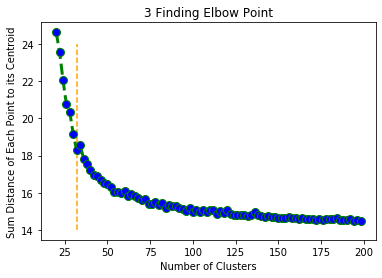

In [16]:
x=clusters
y=cluster_distance

fig=plt.figure()

from kneed import DataGenerator, KneeLocator 
kn=KneeLocator(x, y, curve='convex', direction='decreasing')


plt.plot(x, y,color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=8)

plt.vlines(kn.knee,14, 24,linestyles='dashed',color='orange')

# naming the x axis 
plt.xlabel('Number of Clusters') 
# naming the y axis 
plt.ylabel('Sum Distance of Each Point to its Centroid') 
  
# giving a title to my graph 
plt.title('3 Finding Elbow Point') 
  
# function to show the plot 
plt.show()

In [17]:
kn.knee

32

In [18]:
fig.savefig('3 April7 2017')